# Currency Crystal Ball: Harnessing Machine Learning to Predict Country Currencies

## Preface

Currency, as defined by [Investopedia](https://www.investopedia.com/terms/c/currency.asp), refers to the tangible form of money in the form of paper bills and coins. It serves as a medium of exchange, accepted at face value for goods and services, as well as for savings and debt payments. But how is the value of a currency determined?

In many countries, the exchange rate of their currency is pegged to a widely used currency, such as the U.S. dollar. This practice, known as pegging, aims to maintain stability for investors. When a currency's value drops, it adversely affects the value of investments. However, while currencies are pegged for stability, it doesn't mean that their exchange rates are fixed. [Link](https://world101.cfr.org/global-era-issues/monetary-policy-and-currencies/understanding-currencies-and-exchange-rates)

In fact, most exchange rates are "floating," meaning they are constantly changing due to various economic factors. When a country's economy thrives, its currency appreciates, indicating a higher value. Conversely, when a country's economy faces challenges, its currency depreciates, resulting in a lower worth. [Link](https://world101.cfr.org/global-era-issues/monetary-policy-and-currencies/understanding-currencies-and-exchange-rates)

As a result, the prediction of a country's currency holds significant importance across various domains:

Economic planning benefits from currency prediction as it enables governments, central banks, and policymakers to devise effective strategies. This includes setting appropriate interest rates, making informed decisions regarding fiscal policies, and optimizing international trade.

Investment decisions are empowered by currency prediction, allowing investors to assess the attractiveness of opportunities in different countries. By accurately forecasting currency movements, investors can make informed choices to maximize potential returns, allocate assets effectively, and manage risks.

For tourism and travel, currency prediction plays a vital role. Travelers can plan and budget their trips effectively based on accurate forecasts, enhancing their overall travel experience by optimizing expenses.

Maintaining global financial stability is another crucial aspect. Currency fluctuations can have significant ripple effects on global financial markets and economies. Accurate prediction of currency movements aids policymakers and financial institutions in identifying potential risks, averting crises, and upholding stability within the international financial system.

By understanding and predicting country currencies, we can navigate the intricacies of the global economy, make informed decisions, and optimize outcomes across various sectors.

According to a post by [ibanfirst](https://blog.ibanfirst.com/en/which-are-the-emerging-currencies-to-watch-out-for-in-asia) The Sing dollar (SGD), chinese yuan (CNY), thai baht (THB),  are currencies that are emerging in asia.

## Aim

The aim of this project is to analyze and gain insights on currency fluctuations of SGD, CNY and THB over time. In addtion, develop an accurate prediction model to predict the SGD dollar. By leveraging historical data, economic indicators, and advanced machine learning techniques, we aim to uncover underlying patterns and factors that influence currency value. The ultimate goal is to provide stakeholders with a reliable tool for making informed decisions in economic planning, investment strategies, and risk management.

## Project workflow

1. Data visualization 
2. Base Machine Learning Modelling
3. Machine Learning Improvements
4. Discussions
5. Future Works
6. Conclusion

## Data

The data was collected from kaggle - [Dollar Vs Asian Currencies](https://www.kaggle.com/datasets/imtkaggleteam/dollar-vs-asian-currencies)

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# summary creation
def summary(df):
    #show all columns
    pd.set_option('display.max_rows', None)
    
    #shows number of columns and rows
    shape = df.shape
    print('='*80)
    print('Shape of dataframe')
    print(shape)
    
    #checking for null values
    null_val = df.isnull().sum().sort_values(ascending=False)
    print('='*80)
    indicator = False
    print('Missing values distribution (%):')
    null_val = df.isnull().mean().sort_values(ascending=False)*100
    for i in range(len(null_val)):
        if (null_val[i] != 0):
            print(f'{null_val.index[i]}: {null_val[i]:.4f}')
            indicator = True
        if null_val[i] == 0:
            continue
    if indicator == False:
        print('no null values (ﾉ^_^)ﾉ')
    print('='*80)
    # print('Columns with duplicate values')
    # duplicated = df[df.duplicated()]
    # if duplicated.size > 0:
    #     print (duplicated)
    # else: 
    #     print('No duplicated rows ๑(◕‿◕)๑')
    # print('='*80)
    
    #checking datatype in each column
    print('Column datatypes: ')
    print(df.dtypes)

## Read CSV

In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('./dataset/Dollar-Exchange.csv')

### Displaying table of 37 currencies to 1 usd

In [4]:
df.head()

,Date,CNY=X,OMR=X,IRR=X,THB=X,SYP=X,MYR=X,YER=X,VND=X,ILS=X,JPY=X,LKR=X,IQD=X,PKR=X,KWD=X,KHR=X,UZS=X,SGD=X,INR=X,BDT=X,PHP=X,JOD=X,LAK=X,IDR=X,KRW=X,KZT=X,AED=X,BHD=X,LBP=X,TRY=X,TMT=X,SAR=X,MVR=X,QAR=X,MMK=X,NPR=X,BND=X,AFN=X
0,1/1/2004,NaN,0.38,NaN,39.24,NaN,3.81,NaN,NaN,4.38,107.30,96.65,NaN,57.30,0.29,NaN,NaN,1.7,45.53,NaN,55.24,0.71,NaN,8336.8,1181.6,NaN,3.67,0.38,NaN,NaN,NaN,3.75,NaN,3.64,NaN,NaN,1.69,NaN
1,1/2/2004,8.27,0.38,8236.2,39.53,47.23,3.80,NaN,15147.0,4.40,106.91,97.04,0.3,57.10,0.29,3854.1,NaN,1.7,45.60,57.22,55.40,0.70,7645.7,8445.4,1195.8,168.48,3.67,0.38,1474.1,NaN,NaN,3.75,NaN,3.64,6.18,70.60,1.68,NaN
2,1/5/2004,8.27,0.38,8731.5,39.26,47.25,3.80,NaN,15148.0,4.37,106.24,97.25,0.3,57.10,0.29,3855.0,NaN,1.7,45.47,57.23,55.29,0.71,7643.7,8369.8,1178.9,168.02,3.67,0.38,1474.6,NaN,NaN,3.75,NaN,3.64,6.18,70.62,1.68,NaN
3,1/6/2004,8.27,0.38,8724.7,39.03,47.21,3.80,NaN,15150.0,4.37,106.23,97.50,0.3,57.10,0.29,3852.8,NaN,1.7,45.55,56.92,54.85,0.71,7639.0,8361.8,1189.4,167.55,3.67,0.38,1473.8,NaN,NaN,3.75,NaN,3.64,6.18,70.58,1.68,NaN
4,1/7/2004,8.27,0.38,8728.7,38.97,47.22,3.81,NaN,15153.0,4.39,106.18,97.50,0.3,57.35,0.29,3853.9,NaN,1.7,45.39,57.24,54.91,0.71,7641.5,8369.3,1176.8,167.43,3.67,0.38,1474.3,NaN,NaN,3.75,NaN,3.64,6.18,70.60,1.68,NaN


In [5]:
df.shape

(4956, 38)

## Data Cleaning

Observed that there are '=X' in all of the columns.

Strategy: Rename all columns to remove '=X' in their names

In [6]:
df.columns

Index(['Date', 'CNY=X', 'OMR=X', 'IRR=X', 'THB=X', 'SYP=X', 'MYR=X', 'YER=X',
       'VND=X', 'ILS=X', 'JPY=X', 'LKR=X', 'IQD=X', 'PKR=X', 'KWD=X', 'KHR=X',
       'UZS=X', 'SGD=X', 'INR=X', 'BDT=X', 'PHP=X', 'JOD=X', 'LAK=X', 'IDR=X',
       'KRW=X', 'KZT=X', 'AED=X', 'BHD=X', 'LBP=X', 'TRY=X', 'TMT=X', 'SAR=X',
       'MVR=X', 'QAR=X', 'MMK=X', 'NPR=X', 'BND=X', 'AFN=X'],
      dtype='object')

In [7]:
df.rename(columns={"CNY=X": "CNY", "OMR=X": "OMR", "IRR=X": "IRR",
                  "THB=X": "THB", "SYP=X": "SYP", "MYR=X": "MYR",
                  "YER=X": "YER", "VND=X": "VND", "ILS=X": "ILS",
                  "IQD=X": "IQD", "PKR=X": "PKR", "KWD=X": "KWD",
                  "KHR=X": "KHR", "UZS=X": "UZS", "INR=X": "INR",
                  "LAK=X": "LAK", "IDR=X": "IDR", "KRW=X": "KRW",
                  "KZT=X": "KZT", "AED=X": "AED", "BHD=X": "BHD",
                  "LBP=X": "LBP", "TRY=X": "TRY", "TMT=X": "TMT",
                  "SAR=X": "SAR", "MVR=X": "MVR", "QAR=X": "QAR",
                  "MMK=X": "MMK", "NPR=X": "NPR", "BND=X": "BND",
                   "JPY=X": "JPY", "LKR=X": "LKR", "BDT=X": "BDT",
                   "PHP=X": "PHP", "JOD=X": "JOD", "BND=X": "BND",
                   "AFN=X": "AFN", "SGD=X": "SGD"}, inplace=True)

Remarks: Columns has been renamed

### Convert 'Date' column to datetime format

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4956 entries, 0 to 4955
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
4956 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 38.8 KB


In [10]:
summary(df)

Shape of dataframe
(4956, 38)
Missing values distribution (%):
AFN: 40.7789
SYP: 34.4835
TMT: 31.0129
IRR: 16.4447
MVR: 8.1921
UZS: 7.3043
TRY: 5.5690
YER: 4.6408
PKR: 0.8878
KHR: 0.8878
NPR: 0.7667
LBP: 0.7466
KZT: 0.7466
LKR: 0.7062
KWD: 0.7062
PHP: 0.6860
SAR: 0.6659
BND: 0.6659
INR: 0.6255
KRW: 0.6053
ILS: 0.6053
THB: 0.5851
IDR: 0.5650
JPY: 0.5650
LAK: 0.4439
IQD: 0.4439
MMK: 0.4237
SGD: 0.3228
CNY: 0.3027
QAR: 0.2623
BDT: 0.2623
BHD: 0.2421
AED: 0.2421
OMR: 0.2018
MYR: 0.1614
VND: 0.1412
JOD: 0.0807
Column datatypes: 
Date    datetime64[ns]
CNY            float64
OMR            float64
IRR            float64
THB            float64
SYP            float64
MYR            float64
YER            float64
VND            float64
ILS            float64
JPY            float64
LKR            float64
IQD            float64
PKR            float64
KWD            float64
KHR            float64
UZS            float64
SGD            float64
INR            float64
BDT            float64
PHP       

This summary shows the amount of missing data in dataframe and data type of each columns.

It is observed that there are a lot of missing values. The next section is to tackle these missing values. 

The strategy:
1. Fill <5% missing data with mean values
2. Interpolate missing >5% and <20% data
3. Drop data that are >30%

### Tackling missing datas

In [11]:
df[df['JOD'].isna()].head()

,Date,CNY,OMR,IRR,THB,SYP,MYR,YER,VND,ILS,JPY,LKR,IQD,PKR,KWD,KHR,UZS,SGD,INR,BDT,PHP,JOD,LAK,IDR,KRW,KZT,AED,BHD,LBP,TRY,TMT,SAR,MVR,QAR,MMK,NPR,BND,AFN
72,2004-04-12,NaN,NaN,NaN,39.09,NaN,3.80,NaN,NaN,4.50,105.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8601.8,1135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.67,NaN
1561,2009-12-25,NaN,NaN,NaN,32.79,NaN,3.38,NaN,NaN,3.79,91.11,NaN,NaN,NaN,NaN,NaN,NaN,1.41,NaN,NaN,NaN,NaN,NaN,9431.9,1154.7,NaN,NaN,NaN,NaN,NaN,NaN,3.75,NaN,NaN,818.0,NaN,NaN,NaN
1566,2010-01-01,NaN,NaN,NaN,32.78,NaN,3.37,NaN,NaN,3.78,92.92,NaN,NaN,NaN,NaN,NaN,NaN,1.40,46.61,NaN,NaN,NaN,NaN,9385.6,1146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4135,2019-11-08,NaN,0.38,42000.0,30.41,514.0,NaN,NaN,23207.0,3.50,109.27,177.73,1187.0,155.3,NaN,4055.0,9420.0,1.36,71.38,83.14,50.55,NaN,8835.0,14013.0,1158.6,385.75,NaN,0.37,1506.56,5.77,NaN,NaN,NaN,3.64,1499.0,111.98,1.34,78.0


In [12]:
df['JOD'].head()

0    0.71
1    0.70
2    0.71
3    0.71
4    0.71
Name: JOD, dtype: float64

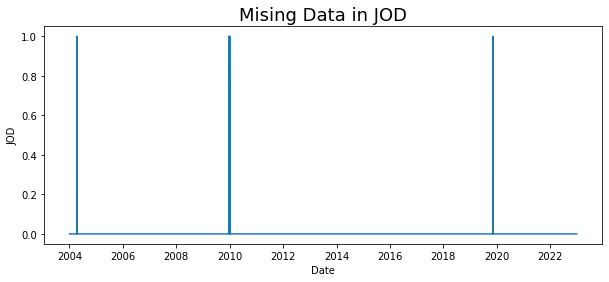

In [13]:
plt.figure(figsize=(10,4))
sns.lineplot(y = df['JOD'].isna(), x = df['Date'])
plt.title(label = 'Mising Data in JOD', fontsize=18)
plt.show();

strategy:
find the average in 2004, 2010 and 2020 and fill the missing values with the average values in respective years.

In [14]:
df.groupby(df['Date'].dt.year).mean()['JOD']

Date
2004    0.709425
2005    0.707192
2006    0.702038
2007    0.700345
2008    0.701641
2009    0.702808
2010    0.700077
2011    0.708462
2012    0.709387
2013    0.708774
2014    0.707548
2015    0.709808
2016    0.709732
2017    0.710000
2018    0.710000
2019    0.709768
2020    0.710000
2021    0.710000
2022    0.710000
Name: JOD, dtype: float64

In [15]:
df.loc[df['Date'].dt.year == 2004, 'JOD'] = df.loc[df['Date'].dt.year == 2004, 'JOD'].fillna(0.707548)

In [16]:
df.loc[df['Date'].dt.year == 2009, 'JOD'] = df.loc[df['Date'].dt.year == 2009, 'JOD'].fillna(0.702808)

In [17]:
df.loc[df['Date'].dt.year == 2010, 'JOD'] = df.loc[df['Date'].dt.year == 2010, 'JOD'].fillna(0.700077)

In [18]:
df.loc[df['Date'].dt.year == 2019, 'JOD'] = df.loc[df['Date'].dt.year == 2019, 'JOD'].fillna(0.709768)

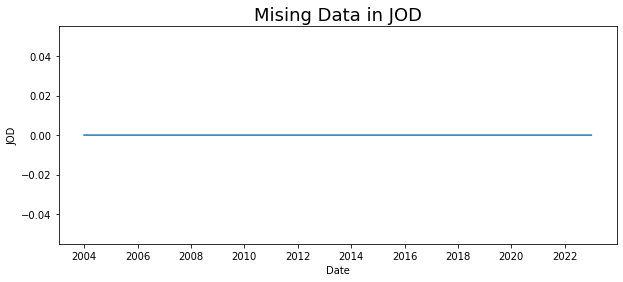

In [19]:
plt.figure(figsize=(10,4))
sns.lineplot(y = df['JOD'].isna(), x = df['Date'])
plt.title(label = 'Mising Data in JOD', fontsize=18)
plt.show();

Remarks: 

Missing data addressed.

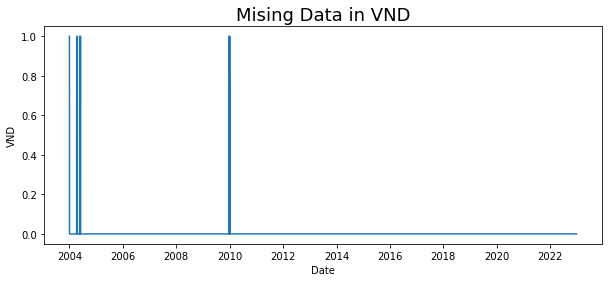

In [20]:
plt.figure(figsize=(10,4))
sns.lineplot(y = df['VND'].isna(), x = df['Date'])
plt.title(label = 'Mising Data in VND', fontsize=18)
plt.show();

In [21]:
df[df['VND'].isna()]['Date'].dt.year.unique()

array([2004, 2009, 2010], dtype=int64)

In [22]:
df.groupby(df['Date'].dt.year).mean()['VND']

Date
2004    15312.984436
2005    15799.561538
2006    15583.161538
2007    15688.402299
2008    16212.141221
2009    17433.988462
2010    18919.630769
2011    20378.211115
2012    20683.168582
2013    20783.061954
2014    20740.505977
2015    21633.613027
2016    22015.172414
2017    22373.180769
2018    22942.742146
2019    23178.839385
2020    23227.946603
2021    22905.417893
2022    23399.607692
Name: VND, dtype: float64

In [23]:
df.loc[df['Date'].dt.year == 2004, 'VND'] = df.loc[df['Date'].dt.year == 2004, 'VND'].fillna(15312.984436)
df.loc[df['Date'].dt.year == 2009, 'VND'] = df.loc[df['Date'].dt.year == 2009, 'VND'].fillna(17433.988462)
df.loc[df['Date'].dt.year == 2010, 'VND'] = df.loc[df['Date'].dt.year == 2010, 'VND'].fillna(18919.630769)

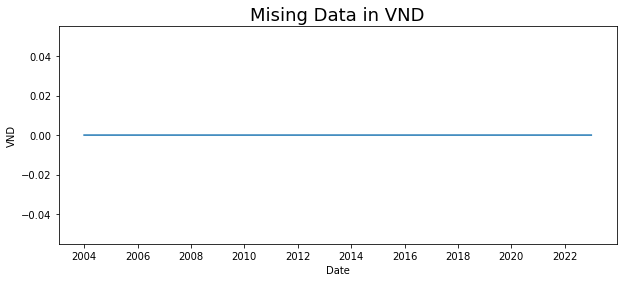

In [24]:
plt.figure(figsize=(10,4))
sns.lineplot(y = df['VND'].isna(), x = df['Date'])
plt.title(label = 'Mising Data in VND', fontsize=18)
plt.show();

remarks: Missing data addressed.

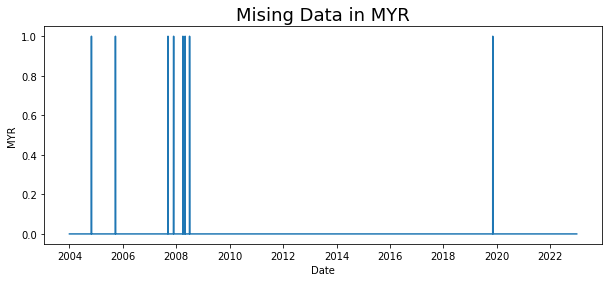

In [25]:
plt.figure(figsize=(10,4))
sns.lineplot(y = df['MYR'].isna(), x = df['Date'])
plt.title(label = 'Mising Data in MYR', fontsize=18)
plt.show();

In [26]:
df[df['MYR'].isna()]['Date'].dt.year.unique()

array([2004, 2005, 2007, 2008, 2019], dtype=int64)

In [27]:
df.groupby(df['Date'].dt.year).mean()['MYR']

Date
2004    3.799119
2005    3.786564
2006    3.660423
2007    3.432239
2008    3.330888
2009    3.516054
2010    3.213755
2011    3.053154
2012    3.083908
2013    3.144330
2014    3.272529
2015    3.898812
2016    4.135441
2017    4.297654
2018    4.032069
2019    4.139653
2020    4.199389
2021    4.141839
2022    4.397346
Name: MYR, dtype: float64

In [28]:
df.loc[df['Date'].dt.year == 2004, 'MYR'] = df.loc[df['Date'].dt.year == 2004, 'MYR'].fillna(3.799119)
df.loc[df['Date'].dt.year == 2005, 'MYR'] = df.loc[df['Date'].dt.year == 2005, 'MYR'].fillna(3.786564)
df.loc[df['Date'].dt.year == 2007, 'MYR'] = df.loc[df['Date'].dt.year == 2007, 'MYR'].fillna(3.432239)
df.loc[df['Date'].dt.year == 2008, 'MYR'] = df.loc[df['Date'].dt.year == 2008, 'MYR'].fillna(3.330888)
df.loc[df['Date'].dt.year == 2019, 'MYR'] = df.loc[df['Date'].dt.year == 2019, 'MYR'].fillna(4.139653)

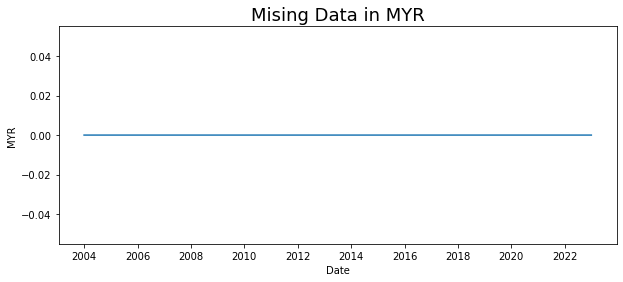

In [29]:
plt.figure(figsize=(10,4))
sns.lineplot(y = df['MYR'].isna(), x = df['Date'])
plt.title(label = 'Mising Data in MYR', fontsize=18)
plt.show();

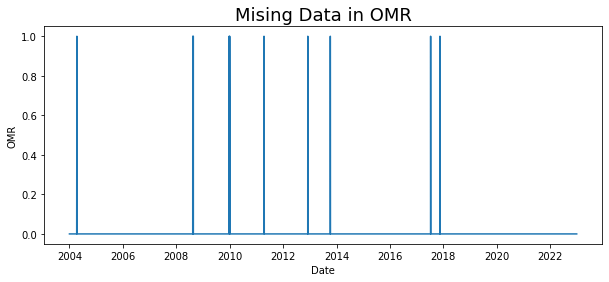

In [30]:
plt.figure(figsize=(10,4))
sns.lineplot(y = df['OMR'].isna(), x = df['Date'])
plt.title(label = 'Mising Data in OMR', fontsize=18)
plt.show();

In [31]:
df[df['OMR'].isna()]['Date'].dt.year.unique()

array([2004, 2008, 2009, 2010, 2011, 2012, 2013, 2017], dtype=int64)

In [32]:
df.groupby(df['Date'].dt.year).mean()['OMR']

Date
2004    0.380000
2005    0.380000
2006    0.379923
2007    0.380000
2008    0.380115
2009    0.380000
2010    0.379808
2011    0.379884
2012    0.380038
2013    0.380000
2014    0.379962
2015    0.380000
2016    0.379923
2017    0.380039
2018    0.380077
2019    0.380000
2020    0.380038
2021    0.380000
2022    0.380000
Name: OMR, dtype: float64

In [33]:
df.loc[df['Date'].dt.year == 2004, 'OMR'] = df.loc[df['Date'].dt.year == 2004, 'OMR'].fillna(0.380000)
df.loc[df['Date'].dt.year == 2008, 'OMR'] = df.loc[df['Date'].dt.year == 2008, 'OMR'].fillna(0.380115)
df.loc[df['Date'].dt.year == 2009, 'OMR'] = df.loc[df['Date'].dt.year == 2009, 'OMR'].fillna(0.380000)
df.loc[df['Date'].dt.year == 2010, 'OMR'] = df.loc[df['Date'].dt.year == 2010, 'OMR'].fillna(0.379808)
df.loc[df['Date'].dt.year == 2011, 'OMR'] = df.loc[df['Date'].dt.year == 2011, 'OMR'].fillna(0.379884)
df.loc[df['Date'].dt.year == 2012, 'OMR'] = df.loc[df['Date'].dt.year == 2012, 'OMR'].fillna(0.380038)
df.loc[df['Date'].dt.year == 2013, 'OMR'] = df.loc[df['Date'].dt.year == 2013, 'OMR'].fillna(0.380000)
df.loc[df['Date'].dt.year == 2017, 'OMR'] = df.loc[df['Date'].dt.year == 2017, 'OMR'].fillna(0.380039)

In [34]:
df[df['OMR'].isna()]['Date'].dt.year.unique()

array([], dtype=int64)

In [35]:
df[df['AED'].isna()]['Date'].dt.year.unique()

array([2004, 2005, 2007, 2008, 2009, 2010, 2019], dtype=int64)

In [36]:
df.groupby(df['Date'].dt.year).mean()['AED']

Date
2004    3.670000
2005    3.670000
2006    3.670038
2007    3.669807
2008    3.670000
2009    3.669923
2010    3.670000
2011    3.670000
2012    3.670000
2013    3.670000
2014    3.670000
2015    3.670000
2016    3.670000
2017    3.670000
2018    3.670000
2019    3.670000
2020    3.670000
2021    3.670000
2022    3.670000
Name: AED, dtype: float64

In [37]:
df.loc[df['Date'].dt.year == 2004, 'AED'] = df.loc[df['Date'].dt.year == 2004, 'AED'].fillna(3.670000)
df.loc[df['Date'].dt.year == 2005, 'AED'] = df.loc[df['Date'].dt.year == 2005, 'AED'].fillna(3.670000)
df.loc[df['Date'].dt.year == 2007, 'AED'] = df.loc[df['Date'].dt.year == 2007, 'AED'].fillna(3.669807)
df.loc[df['Date'].dt.year == 2008, 'AED'] = df.loc[df['Date'].dt.year == 2008, 'AED'].fillna(3.670000)
df.loc[df['Date'].dt.year == 2009, 'AED'] = df.loc[df['Date'].dt.year == 2009, 'AED'].fillna(3.669923)
df.loc[df['Date'].dt.year == 2010, 'AED'] = df.loc[df['Date'].dt.year == 2010, 'AED'].fillna(3.670000)
df.loc[df['Date'].dt.year == 2019, 'AED'] = df.loc[df['Date'].dt.year == 2019, 'AED'].fillna(3.670000)

In [38]:
df[df['AED'].isna()]['Date'].dt.year.unique()

array([], dtype=int64)

In [39]:
df[df['BHD'].isna()]['Date'].dt.year.unique()

array([2004, 2008, 2009, 2010, 2011, 2012, 2013, 2017], dtype=int64)

In [40]:
df.groupby(df['Date'].dt.year).mean()['BHD']

Date
2004    0.380000
2005    0.379846
2006    0.372885
2007    0.368161
2008    0.376783
2009    0.379038
2010    0.378654
2011    0.376100
2012    0.370615
2013    0.370462
2014    0.370498
2015    0.370613
2016    0.369157
2017    0.370775
2018    0.372299
2019    0.370077
2020    0.370840
2021    0.370038
2022    0.370115
Name: BHD, dtype: float64

In [41]:
df.loc[df['Date'].dt.year == 2004, 'BHD'] = df.loc[df['Date'].dt.year == 2004, 'BHD'].fillna(0.380000)
df.loc[df['Date'].dt.year == 2008, 'BHD'] = df.loc[df['Date'].dt.year == 2008, 'BHD'].fillna(0.376783)
df.loc[df['Date'].dt.year == 2009, 'BHD'] = df.loc[df['Date'].dt.year == 2009, 'BHD'].fillna(0.379038)
df.loc[df['Date'].dt.year == 2010, 'BHD'] = df.loc[df['Date'].dt.year == 2010, 'BHD'].fillna(0.378654)
df.loc[df['Date'].dt.year == 2011, 'BHD'] = df.loc[df['Date'].dt.year == 2011, 'BHD'].fillna(0.376100)
df.loc[df['Date'].dt.year == 2012, 'BHD'] = df.loc[df['Date'].dt.year == 2012, 'BHD'].fillna(0.370615)
df.loc[df['Date'].dt.year == 2013, 'BHD'] = df.loc[df['Date'].dt.year == 2013, 'BHD'].fillna(0.370462)
df.loc[df['Date'].dt.year == 2017, 'BHD'] = df.loc[df['Date'].dt.year == 2017, 'BHD'].fillna(0.370775)

In [42]:
df[df['BHD'].isna()]['Date'].dt.year.unique()

array([], dtype=int64)

In [43]:
df[df['BDT'].isna()]['Date'].dt.year.unique()

array([2004, 2008, 2009, 2010, 2011, 2013, 2017], dtype=int64)

In [44]:
df.groupby(df['Date'].dt.year).mean()['BDT']

Date
2004    57.694669
2005    63.575077
2006    66.591769
2007    67.134138
2008    67.435885
2009    67.631615
2010    68.211885
2011    72.730579
2012    80.446360
2013    76.723577
2014    76.206743
2015    76.218391
2016    76.949923
2017    79.624767
2018    82.609157
2019    82.787385
2020    83.272405
2021    83.559732
2022    91.684231
Name: BDT, dtype: float64

In [45]:
df.loc[df['Date'].dt.year == 2004, 'BDT'] = df.loc[df['Date'].dt.year == 2004, 'BDT'].fillna(57.694669)
df.loc[df['Date'].dt.year == 2008, 'BDT'] = df.loc[df['Date'].dt.year == 2008, 'BDT'].fillna(67.435885)
df.loc[df['Date'].dt.year == 2009, 'BDT'] = df.loc[df['Date'].dt.year == 2009, 'BDT'].fillna(67.631615)
df.loc[df['Date'].dt.year == 2010, 'BDT'] = df.loc[df['Date'].dt.year == 2010, 'BDT'].fillna(68.211885)
df.loc[df['Date'].dt.year == 2011, 'BDT'] = df.loc[df['Date'].dt.year == 2011, 'BDT'].fillna(72.730579)
df.loc[df['Date'].dt.year == 2013, 'BDT'] = df.loc[df['Date'].dt.year == 2013, 'BDT'].fillna(76.723577)
df.loc[df['Date'].dt.year == 2017, 'BDT'] = df.loc[df['Date'].dt.year == 2017, 'BDT'].fillna(79.624767)

In [46]:
df[df['BDT'].isna()]['Date'].dt.year.unique()

array([], dtype=int64)

In [47]:
df[df['QAR'].isna()]['Date'].dt.year.unique()

array([2004, 2008, 2009, 2010, 2011, 2012, 2013, 2017], dtype=int64)

In [48]:
df.groupby(df['Date'].dt.year).mean()['QAR']

Date
2004    3.639617
2005    3.638731
2006    3.566462
2007    3.562912
2008    3.624786
2009    3.637885
2010    3.630846
2011    3.620541
2012    3.631923
2013    3.631577
2014    3.636705
2015    3.639808
2016    3.638352
2017    3.668372
2018    3.640000
2019    3.640000
2020    3.637557
2021    3.639387
2022    3.639962
Name: QAR, dtype: float64

In [49]:
df.loc[df['Date'].dt.year == 2004, 'QAR'] = df.loc[df['Date'].dt.year == 2004, 'QAR'].fillna(3.639617)
df.loc[df['Date'].dt.year == 2008, 'QAR'] = df.loc[df['Date'].dt.year == 2008, 'QAR'].fillna(3.624786)
df.loc[df['Date'].dt.year == 2009, 'QAR'] = df.loc[df['Date'].dt.year == 2009, 'QAR'].fillna(3.637885)
df.loc[df['Date'].dt.year == 2010, 'QAR'] = df.loc[df['Date'].dt.year == 2010, 'QAR'].fillna(3.630846)
df.loc[df['Date'].dt.year == 2011, 'QAR'] = df.loc[df['Date'].dt.year == 2011, 'QAR'].fillna(3.620541)
df.loc[df['Date'].dt.year == 2012, 'QAR'] = df.loc[df['Date'].dt.year == 2012, 'QAR'].fillna(3.631923)
df.loc[df['Date'].dt.year == 2013, 'QAR'] = df.loc[df['Date'].dt.year == 2013, 'QAR'].fillna(3.631577)
df.loc[df['Date'].dt.year == 2017, 'QAR'] = df.loc[df['Date'].dt.year == 2017, 'QAR'].fillna(3.668372)

In [50]:
df[df['QAR'].isna()]['Date'].dt.year.unique()

array([], dtype=int64)

In [51]:
df[df['CNY'].isna()]['Date'].dt.year.unique()

array([2004, 2008, 2009, 2010, 2011, 2013, 2017, 2019], dtype=int64)

In [52]:
df.groupby(df['Date'].dt.year).mean()['CNY']

Date
2004    8.270000
2005    8.185231
2006    7.964846
2007    7.597126
2008    6.940615
2009    6.821654
2010    6.759923
2011    6.454479
2012    6.309157
2013    6.142577
2014    6.150958
2015    6.274138
2016    6.635785
2017    6.758682
2018    6.614215
2019    6.908185
2020    6.901641
2021    6.450690
2022    6.729577
Name: CNY, dtype: float64

In [53]:
df.loc[df['Date'].dt.year == 2004, 'CNY'] = df.loc[df['Date'].dt.year == 2004, 'CNY'].fillna(8.270000)
df.loc[df['Date'].dt.year == 2008, 'CNY'] = df.loc[df['Date'].dt.year == 2008, 'CNY'].fillna(6.940615)
df.loc[df['Date'].dt.year == 2009, 'CNY'] = df.loc[df['Date'].dt.year == 2009, 'CNY'].fillna(6.821654)
df.loc[df['Date'].dt.year == 2010, 'CNY'] = df.loc[df['Date'].dt.year == 2010, 'CNY'].fillna(6.759923)
df.loc[df['Date'].dt.year == 2011, 'CNY'] = df.loc[df['Date'].dt.year == 2011, 'CNY'].fillna(6.454479)
df.loc[df['Date'].dt.year == 2013, 'CNY'] = df.loc[df['Date'].dt.year == 2013, 'CNY'].fillna(6.142577)
df.loc[df['Date'].dt.year == 2017, 'CNY'] = df.loc[df['Date'].dt.year == 2017, 'CNY'].fillna(6.758682)
df.loc[df['Date'].dt.year == 2019, 'CNY'] = df.loc[df['Date'].dt.year == 2019, 'CNY'].fillna(6.908185)

In [54]:
df[df['CNY'].isna()]['Date'].dt.year.unique()

array([], dtype=int64)

In [55]:
df[df['SGD'].isna()]['Date'].dt.year.unique()

array([2004, 2005, 2007, 2008, 2011, 2013, 2017], dtype=int64)

In [56]:
df.groupby(df['Date'].dt.year).mean()['SGD']

Date
2004    1.689691
2005    1.664125
2006    1.588577
2007    1.507016
2008    1.415019
2009    1.453525
2010    1.362490
2011    1.256873
2012    1.249387
2013    1.251077
2014    1.266935
2015    1.374138
2016    1.380460
2017    1.381357
2018    1.348851
2019    1.363885
2020    1.379122
2021    1.343487
2022    1.379269
Name: SGD, dtype: float64

In [57]:
df.loc[df['Date'].dt.year == 2004, 'SGD'] = df.loc[df['Date'].dt.year == 2004, 'SGD'].fillna(1.689691)
df.loc[df['Date'].dt.year == 2005, 'SGD'] = df.loc[df['Date'].dt.year == 2005, 'SGD'].fillna(1.664125)
df.loc[df['Date'].dt.year == 2007, 'SGD'] = df.loc[df['Date'].dt.year == 2007, 'SGD'].fillna(1.507016)
df.loc[df['Date'].dt.year == 2008, 'SGD'] = df.loc[df['Date'].dt.year == 2008, 'SGD'].fillna(1.415019)
df.loc[df['Date'].dt.year == 2011, 'SGD'] = df.loc[df['Date'].dt.year == 2011, 'SGD'].fillna(1.256873)
df.loc[df['Date'].dt.year == 2013, 'SGD'] = df.loc[df['Date'].dt.year == 2013, 'SGD'].fillna(1.251077)
df.loc[df['Date'].dt.year == 2017, 'SGD'] = df.loc[df['Date'].dt.year == 2017, 'SGD'].fillna(1.381357)

In [58]:
df[df['SGD'].isna()]['Date'].dt.year.unique()

array([], dtype=int64)

In [59]:
df[df['MMK'].isna()]['Date'].dt.year.unique()

array([2004, 2005, 2007, 2008, 2009, 2010], dtype=int64)

In [60]:
df.groupby(df['Date'].dt.year).mean()['MMK']

Date
2004       6.177686
2005       6.138627
2006       6.144231
2007       6.247287
2008       6.340232
2009       9.452162
2010       6.304654
2011      18.800308
2012     626.547663
2013     917.165211
2014     967.750843
2015    1145.191686
2016    1216.750575
2017    1341.736154
2018    1423.129885
2019    1502.031231
2020    1357.213282
2021    1594.749464
2022    1909.603577
Name: MMK, dtype: float64

In [61]:
df.loc[df['Date'].dt.year == 2004, 'MMK'] = df.loc[df['Date'].dt.year == 2004, 'MMK'].fillna(6.177686)
df.loc[df['Date'].dt.year == 2005, 'MMK'] = df.loc[df['Date'].dt.year == 2005, 'MMK'].fillna(6.138627)
df.loc[df['Date'].dt.year == 2007, 'MMK'] = df.loc[df['Date'].dt.year == 2007, 'MMK'].fillna(6.247287)
df.loc[df['Date'].dt.year == 2008, 'MMK'] = df.loc[df['Date'].dt.year == 2008, 'MMK'].fillna(6.340232)
df.loc[df['Date'].dt.year == 2009, 'MMK'] = df.loc[df['Date'].dt.year == 2009, 'MMK'].fillna(9.452162)
df.loc[df['Date'].dt.year == 2010, 'MMK'] = df.loc[df['Date'].dt.year == 2010, 'MMK'].fillna(6.304654)

In [62]:
df[df['MMK'].isna()]['Date'].dt.year.unique()

array([], dtype=int64)

In [63]:
df[df['IQD'].isna()]['Date'].dt.year.unique()

array([2004, 2005, 2007, 2008, 2009, 2010], dtype=int64)

In [64]:
df.loc[df['Date'].dt.year == 2004, 'MMK'] = df.loc[df['Date'].dt.year == 2004, 'MMK'].fillna(6.177686)

In [65]:
df[df['IQD'].isna()]['Date'].dt.year.unique()

array([2004, 2005, 2007, 2008, 2009, 2010], dtype=int64)

In [66]:
df.groupby(df['Date'].dt.year).mean()['IQD']

Date
2004    1311.517255
2005    1430.446667
2006    1416.566538
2007    1219.610465
2008    1175.142085
2009    1139.368992
2010    1139.417038
2011    1158.736538
2012    1152.705747
2013    1147.590651
2014    1123.855977
2015    1146.701533
2016    1146.282759
2017    1153.422308
2018    1175.700536
2019    1177.591154
2020    1188.178817
2021    1452.425900
2022    1451.176577
Name: IQD, dtype: float64

In [67]:
df.loc[df['Date'].dt.year == 2004, 'IQD'] = df.loc[df['Date'].dt.year == 2004, 'IQD'].fillna(1311.517255)
df.loc[df['Date'].dt.year == 2005, 'IQD'] = df.loc[df['Date'].dt.year == 2005, 'IQD'].fillna(1430.446667)
df.loc[df['Date'].dt.year == 2007, 'IQD'] = df.loc[df['Date'].dt.year == 2007, 'IQD'].fillna(1219.610465)
df.loc[df['Date'].dt.year == 2008, 'IQD'] = df.loc[df['Date'].dt.year == 2008, 'IQD'].fillna(1175.142085)
df.loc[df['Date'].dt.year == 2009, 'IQD'] = df.loc[df['Date'].dt.year == 2009, 'IQD'].fillna(1139.368992)
df.loc[df['Date'].dt.year == 2010, 'IQD'] = df.loc[df['Date'].dt.year == 2010, 'IQD'].fillna(1139.417038)

In [68]:
df[df['IQD'].isna()]['Date'].dt.year.unique()

array([], dtype=int64)

In [69]:
df[df['LAK'].isna()]['Date'].dt.year.unique()

array([2004, 2005, 2007, 2008, 2009, 2010], dtype=int64)

In [70]:
df.groupby(df['Date'].dt.year).mean()['LAK']

Date
2004     7622.044314
2005     9282.931373
2006     9662.261154
2007     9350.424031
2008     8597.249035
2009     8344.527519
2010     8145.299231
2011     7961.180769
2012     7892.369732
2013     7723.376628
2014     7890.199617
2015     8002.056705
2016     7932.711494
2017     8066.292308
2018     8306.387739
2019     8613.065538
2020     9020.342786
2021     9684.036360
2022    14179.484038
Name: LAK, dtype: float64

In [71]:
df.loc[df['Date'].dt.year == 2004, 'LAK'] = df.loc[df['Date'].dt.year == 2004, 'LAK'].fillna(7622.044314)
df.loc[df['Date'].dt.year == 2005, 'LAK'] = df.loc[df['Date'].dt.year == 2005, 'LAK'].fillna(9282.931373)
df.loc[df['Date'].dt.year == 2007, 'LAK'] = df.loc[df['Date'].dt.year == 2007, 'LAK'].fillna(9350.424031)
df.loc[df['Date'].dt.year == 2008, 'LAK'] = df.loc[df['Date'].dt.year == 2008, 'LAK'].fillna(8597.249035)
df.loc[df['Date'].dt.year == 2009, 'LAK'] = df.loc[df['Date'].dt.year == 2009, 'LAK'].fillna(8344.527519)
df.loc[df['Date'].dt.year == 2010, 'LAK'] = df.loc[df['Date'].dt.year == 2010, 'LAK'].fillna(8145.299231)

In [72]:
df[df['LAK'].isna()]['Date'].dt.year.unique()

array([], dtype=int64)

In [73]:
df[df['JPY'].isna()]['Date'].dt.year.unique()

array([2004, 2005, 2007, 2008, 2011, 2013, 2017], dtype=int64)

In [74]:
df.groupby(df['Date'].dt.year).mean()['JPY']

Date
2004    108.114291
2005    110.169112
2006    116.318885
2007    117.813798
2008    103.095267
2009     93.586398
2010     87.749464
2011     79.718185
2012     79.806015
2013     97.581269
2014    105.867356
2015    121.028199
2016    108.771149
2017    112.156938
2018    110.445441
2019    109.007115
2020    106.766489
2021    109.825402
2022    131.489692
Name: JPY, dtype: float64

In [75]:
df.loc[df['Date'].dt.year == 2004, 'JPY'] = df.loc[df['Date'].dt.year == 2004, 'JPY'].fillna(108.114291)
df.loc[df['Date'].dt.year == 2005, 'JPY'] = df.loc[df['Date'].dt.year == 2005, 'JPY'].fillna(110.169112)
df.loc[df['Date'].dt.year == 2007, 'JPY'] = df.loc[df['Date'].dt.year == 2007, 'JPY'].fillna(117.813798)
df.loc[df['Date'].dt.year == 2008, 'JPY'] = df.loc[df['Date'].dt.year == 2008, 'JPY'].fillna(103.095267)
df.loc[df['Date'].dt.year == 2011, 'JPY'] = df.loc[df['Date'].dt.year == 2011, 'JPY'].fillna(79.718185)
df.loc[df['Date'].dt.year == 2013, 'JPY'] = df.loc[df['Date'].dt.year == 2013, 'JPY'].fillna(97.581269)
df.loc[df['Date'].dt.year == 2017, 'JPY'] = df.loc[df['Date'].dt.year == 2017, 'JPY'].fillna(112.156938)

In [76]:
df[df['JPY'].isna()]['Date'].dt.year.unique()

array([], dtype=int64)

In [77]:
df[df['IDR'].isna()]['Date'].dt.year.unique()

array([2007, 2008, 2011, 2012, 2013, 2017], dtype=int64)

In [78]:
df.groupby(df['Date'].dt.year).mean()['IDR']

Date
2004     8936.759542
2005     9702.374231
2006     9148.163077
2007     9123.614729
2008     9713.366529
2009    10373.192337
2010     9036.112490
2011     8737.282625
2012     9304.154615
2013    10321.196538
2014    11841.034483
2015    13352.896552
2016    13285.613027
2017    13371.844961
2018    14239.701916
2019    14151.294923
2020    14532.005229
2021    14310.539617
2022    14843.177308
Name: IDR, dtype: float64

In [79]:
df.loc[df['Date'].dt.year == 2004, 'IDR'] = df.loc[df['Date'].dt.year == 2004, 'IDR'].fillna(8936.759542)
df.loc[df['Date'].dt.year == 2007, 'IDR'] = df.loc[df['Date'].dt.year == 2007, 'IDR'].fillna(9123.614729)
df.loc[df['Date'].dt.year == 2008, 'IDR'] = df.loc[df['Date'].dt.year == 2008, 'IDR'].fillna(9713.366529)
df.loc[df['Date'].dt.year == 2011, 'IDR'] = df.loc[df['Date'].dt.year == 2011, 'IDR'].fillna(8737.282625)
df.loc[df['Date'].dt.year == 2012, 'IDR'] = df.loc[df['Date'].dt.year == 2012, 'IDR'].fillna(9304.154615)
df.loc[df['Date'].dt.year == 2013, 'IDR'] = df.loc[df['Date'].dt.year == 2013, 'IDR'].fillna(10321.196538)
df.loc[df['Date'].dt.year == 2017, 'IDR'] = df.loc[df['Date'].dt.year == 2017, 'IDR'].fillna(13371.844961)

In [80]:
df[df['IDR'].isna()]['Date'].dt.year.unique()

array([], dtype=int64)

In [81]:
df[df['THB'].isna()]['Date'].dt.year.unique()

array([2004, 2005, 2007, 2008, 2011, 2013, 2017], dtype=int64)

In [82]:
df.groupby(df['Date'].dt.year).mean()['THB']

Date
2004    40.192797
2005    40.218880
2006    37.862462
2007    32.166744
2008    32.760000
2009    34.132146
2010    31.495441
2011    30.377838
2012    30.957318
2013    30.598923
2014    32.417088
2015    34.215326
2016    35.219962
2017    33.929612
2018    32.308008
2019    31.037346
2020    31.269084
2021    31.972261
2022    35.032808
Name: THB, dtype: float64

In [83]:
df.loc[df['Date'].dt.year == 2004, 'THB'] = df.loc[df['Date'].dt.year == 2004, 'THB'].fillna(40.192797)
df.loc[df['Date'].dt.year == 2005, 'THB'] = df.loc[df['Date'].dt.year == 2005, 'THB'].fillna(40.218880)
df.loc[df['Date'].dt.year == 2007, 'THB'] = df.loc[df['Date'].dt.year == 2007, 'THB'].fillna(32.166744)
df.loc[df['Date'].dt.year == 2008, 'THB'] = df.loc[df['Date'].dt.year == 2008, 'THB'].fillna(32.760000)
df.loc[df['Date'].dt.year == 2011, 'THB'] = df.loc[df['Date'].dt.year == 2011, 'THB'].fillna(30.377838)
df.loc[df['Date'].dt.year == 2013, 'THB'] = df.loc[df['Date'].dt.year == 2013, 'THB'].fillna(30.598923)
df.loc[df['Date'].dt.year == 2017, 'THB'] = df.loc[df['Date'].dt.year == 2017, 'THB'].fillna(33.929612)

In [84]:
df[df['THB'].isna()]['Date'].dt.year.unique()

array([], dtype=int64)

In [85]:
df[df['KRW'].isna()]['Date'].dt.year.unique()

array([2004, 2005, 2007, 2008, 2011, 2012, 2013, 2017], dtype=int64)

In [86]:
df.groupby(df['Date'].dt.year).mean()['KRW']

Date
2004    1141.757088
2005    1020.423861
2006     941.396115
2007     923.976202
2008    1104.869215
2009    1272.312261
2010    1154.686207
2011    1106.006178
2012    1123.652346
2013    1091.122192
2014    1051.443793
2015    1129.992490
2016    1158.687011
2017    1129.928256
2018    1099.446475
2019    1164.024423
2020    1178.353740
2021    1143.850536
2022    1291.037692
Name: KRW, dtype: float64

In [87]:
df.loc[df['Date'].dt.year == 2004, 'KRW'] = df.loc[df['Date'].dt.year == 2004, 'KRW'].fillna(1141.757088)
df.loc[df['Date'].dt.year == 2005, 'KRW'] = df.loc[df['Date'].dt.year == 2005, 'KRW'].fillna(1020.423861)
df.loc[df['Date'].dt.year == 2007, 'KRW'] = df.loc[df['Date'].dt.year == 2007, 'KRW'].fillna(923.976202)
df.loc[df['Date'].dt.year == 2008, 'KRW'] = df.loc[df['Date'].dt.year == 2008, 'KRW'].fillna(1104.869215)
df.loc[df['Date'].dt.year == 2011, 'KRW'] = df.loc[df['Date'].dt.year == 2011, 'KRW'].fillna(1106.006178)
df.loc[df['Date'].dt.year == 2012, 'KRW'] = df.loc[df['Date'].dt.year == 2012, 'KRW'].fillna(1123.652346)
df.loc[df['Date'].dt.year == 2013, 'KRW'] = df.loc[df['Date'].dt.year == 2013, 'KRW'].fillna(1091.122192)
df.loc[df['Date'].dt.year == 2017, 'KRW'] = df.loc[df['Date'].dt.year == 2017, 'KRW'].fillna(1129.928256)

In [88]:
df[df['KRW'].isna()]['Date'].dt.year.unique()

array([], dtype=int64)

In [89]:
df[df['ILS'].isna()]['Date'].dt.year.unique()

array([2004, 2005, 2007, 2008, 2011, 2013, 2017, 2020], dtype=int64)

In [90]:
df.groupby(df['Date'].dt.year).mean()['ILS']

Date
2004    4.469310
2005    4.477220
2006    4.447154
2007    4.104612
2008    3.584421
2009    3.922490
2010    3.729425
2011    3.570579
2012    3.848927
2013    3.605077
2014    3.571456
2015    3.879732
2016    3.833218
2017    3.594884
2018    3.590728
2019    3.563000
2020    3.437050
2021    3.229655
2022    3.357115
Name: ILS, dtype: float64

In [91]:
df.loc[df['Date'].dt.year == 2004, 'ILS'] = df.loc[df['Date'].dt.year == 2004, 'ILS'].fillna(4.469310)
df.loc[df['Date'].dt.year == 2005, 'ILS'] = df.loc[df['Date'].dt.year == 2005, 'ILS'].fillna(4.477220)
df.loc[df['Date'].dt.year == 2007, 'ILS'] = df.loc[df['Date'].dt.year == 2007, 'ILS'].fillna(4.104612)
df.loc[df['Date'].dt.year == 2008, 'ILS'] = df.loc[df['Date'].dt.year == 2008, 'ILS'].fillna(3.584421)
df.loc[df['Date'].dt.year == 2011, 'ILS'] = df.loc[df['Date'].dt.year == 2011, 'ILS'].fillna(3.570579)
df.loc[df['Date'].dt.year == 2013, 'ILS'] = df.loc[df['Date'].dt.year == 2013, 'ILS'].fillna(3.605077)
df.loc[df['Date'].dt.year == 2017, 'ILS'] = df.loc[df['Date'].dt.year == 2017, 'ILS'].fillna(3.594884)
df.loc[df['Date'].dt.year == 2020, 'ILS'] = df.loc[df['Date'].dt.year == 2020, 'ILS'].fillna(3.437050)

In [92]:
df[df['ILS'].isna()]['Date'].dt.year.unique()

array([], dtype=int64)

In [93]:
df[df['INR'].isna()]['Date'].dt.year.unique()

array([2004, 2005, 2007, 2008, 2009, 2011, 2013, 2017], dtype=int64)

In [94]:
df.groupby(df['Date'].dt.year).mean()['INR']

Date
2004    45.188692
2005    44.003707
2006    45.183385
2007    41.191822
2008    43.464587
2009    48.283615
2010    45.622222
2011    46.562548
2012    53.405019
2013    58.529038
2014    60.973410
2015    64.124176
2016    67.166667
2017    65.109612
2018    68.451609
2019    70.509769
2020    74.222786
2021    73.935862
2022    78.576846
Name: INR, dtype: float64

In [95]:
df.loc[df['Date'].dt.year == 2004, 'INR'] = df.loc[df['Date'].dt.year == 2004, 'INR'].fillna(45.188692)
df.loc[df['Date'].dt.year == 2005, 'INR'] = df.loc[df['Date'].dt.year == 2005, 'INR'].fillna(44.003707)
df.loc[df['Date'].dt.year == 2007, 'INR'] = df.loc[df['Date'].dt.year == 2007, 'INR'].fillna(41.191822)
df.loc[df['Date'].dt.year == 2008, 'INR'] = df.loc[df['Date'].dt.year == 2008, 'INR'].fillna(43.464587)
df.loc[df['Date'].dt.year == 2009, 'INR'] = df.loc[df['Date'].dt.year == 2009, 'INR'].fillna(48.283615)
df.loc[df['Date'].dt.year == 2011, 'INR'] = df.loc[df['Date'].dt.year == 2011, 'INR'].fillna(46.562548)
df.loc[df['Date'].dt.year == 2013, 'INR'] = df.loc[df['Date'].dt.year == 2013, 'INR'].fillna(58.529038)
df.loc[df['Date'].dt.year == 2017, 'INR'] = df.loc[df['Date'].dt.year == 2017, 'INR'].fillna(65.109612)

In [96]:
df[df['INR'].isna()]['Date'].dt.year.unique()

array([], dtype=int64)

In [97]:
df[df['BND'].isna()]['Date'].dt.year.unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2017], dtype=int64)

In [98]:
df.groupby(df['Date'].dt.year).mean()['BND']

Date
2004    1.668702
2005    1.642885
2006    1.563654
2007    1.486667
2008    1.399587
2009    1.436008
2010    1.343654
2011    1.239151
2012    1.230462
2013    1.231737
2014    1.247854
2015    1.351418
2016    1.358199
2017    1.359457
2018    1.036207
2019    1.286038
2020    1.357748
2021    1.322720
2022    1.354808
Name: BND, dtype: float64

In [99]:
df.loc[df['Date'].dt.year == 2007, 'BND'] = df.loc[df['Date'].dt.year == 2007, 'BND'].fillna(1.486667)
df.loc[df['Date'].dt.year == 2008, 'BND'] = df.loc[df['Date'].dt.year == 2008, 'BND'].fillna(1.399587)
df.loc[df['Date'].dt.year == 2009, 'BND'] = df.loc[df['Date'].dt.year == 2009, 'BND'].fillna(1.436008)
df.loc[df['Date'].dt.year == 2010, 'BND'] = df.loc[df['Date'].dt.year == 2010, 'BND'].fillna(1.343654)
df.loc[df['Date'].dt.year == 2011, 'BND'] = df.loc[df['Date'].dt.year == 2011, 'BND'].fillna(1.239151)
df.loc[df['Date'].dt.year == 2012, 'BND'] = df.loc[df['Date'].dt.year == 2012, 'BND'].fillna(1.230462)
df.loc[df['Date'].dt.year == 2013, 'BND'] = df.loc[df['Date'].dt.year == 2013, 'BND'].fillna(1.231737)
df.loc[df['Date'].dt.year == 2017, 'BND'] = df.loc[df['Date'].dt.year == 2017, 'BND'].fillna(1.359457)

In [100]:
df[df['BND'].isna()]['Date'].dt.year.unique()

array([], dtype=int64)

In [101]:
df[df['SAR'].isna()]['Date'].dt.year.unique()

array([2004, 2005, 2007, 2008, 2010, 2011, 2013, 2014, 2017, 2019],
      dtype=int64)

In [102]:
df.groupby(df['Date'].dt.year).mean()['SAR']

Date
2004    3.750000
2005    3.750000
2006    3.749885
2007    3.742132
2008    3.741198
2009    3.745939
2010    3.749654
2011    3.749884
2012    3.749655
2013    3.749654
2014    3.749462
2015    3.749195
2016    3.746705
2017    3.749380
2018    3.749885
2019    3.749846
2020    3.750153
2021    3.749923
2022    3.751462
Name: SAR, dtype: float64

In [103]:
df.loc[df['Date'].dt.year == 2004, 'SAR'] = df.loc[df['Date'].dt.year == 2004, 'SAR'].fillna(3.750000)
df.loc[df['Date'].dt.year == 2005, 'SAR'] = df.loc[df['Date'].dt.year == 2005, 'SAR'].fillna(3.750000)
df.loc[df['Date'].dt.year == 2007, 'SAR'] = df.loc[df['Date'].dt.year == 2007, 'SAR'].fillna(3.742132)
df.loc[df['Date'].dt.year == 2008, 'SAR'] = df.loc[df['Date'].dt.year == 2008, 'SAR'].fillna(3.741198)
df.loc[df['Date'].dt.year == 2010, 'SAR'] = df.loc[df['Date'].dt.year == 2010, 'SAR'].fillna(3.749654)
df.loc[df['Date'].dt.year == 2011, 'SAR'] = df.loc[df['Date'].dt.year == 2011, 'SAR'].fillna(3.749884)
df.loc[df['Date'].dt.year == 2013, 'SAR'] = df.loc[df['Date'].dt.year == 2013, 'SAR'].fillna(3.749654)
df.loc[df['Date'].dt.year == 2014, 'SAR'] = df.loc[df['Date'].dt.year == 2014, 'SAR'].fillna(3.749462)
df.loc[df['Date'].dt.year == 2017, 'SAR'] = df.loc[df['Date'].dt.year == 2017, 'SAR'].fillna(3.749380)
df.loc[df['Date'].dt.year == 2019, 'SAR'] = df.loc[df['Date'].dt.year == 2019, 'SAR'].fillna(3.749846)

In [104]:
df[df['SAR'].isna()]['Date'].dt.year.unique()

array([], dtype=int64)

In [105]:
df[df['PHP'].isna()]['Date'].dt.year.unique()

array([2004, 2005, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2017],
      dtype=int64)

In [106]:
df.groupby(df['Date'].dt.year).mean()['PHP']

Date
2004    55.795753
2005    54.923977
2006    51.114654
2007    45.940581
2008    44.273719
2009    47.431269
2010    44.992423
2011    43.196371
2012    42.109615
2013    42.336500
2014    44.310077
2015    45.400038
2016    47.338276
2017    50.277171
2018    52.586475
2019    51.745231
2020    49.610344
2021    49.292912
2022    54.537115
Name: PHP, dtype: float64

In [107]:
df.loc[df['Date'].dt.year == 2004, 'PHP'] = df.loc[df['Date'].dt.year == 2004, 'PHP'].fillna(55.795753)
df.loc[df['Date'].dt.year == 2005, 'PHP'] = df.loc[df['Date'].dt.year == 2005, 'PHP'].fillna(54.923977)
df.loc[df['Date'].dt.year == 2007, 'PHP'] = df.loc[df['Date'].dt.year == 2007, 'PHP'].fillna(45.940581)
df.loc[df['Date'].dt.year == 2008, 'PHP'] = df.loc[df['Date'].dt.year == 2008, 'PHP'].fillna(44.273719)
df.loc[df['Date'].dt.year == 2009, 'PHP'] = df.loc[df['Date'].dt.year == 2009, 'PHP'].fillna(47.431269)
df.loc[df['Date'].dt.year == 2010, 'PHP'] = df.loc[df['Date'].dt.year == 2010, 'PHP'].fillna(44.992423)
df.loc[df['Date'].dt.year == 2011, 'PHP'] = df.loc[df['Date'].dt.year == 2011, 'PHP'].fillna(43.196371)
df.loc[df['Date'].dt.year == 2012, 'PHP'] = df.loc[df['Date'].dt.year == 2012, 'PHP'].fillna(42.109615)
df.loc[df['Date'].dt.year == 2013, 'PHP'] = df.loc[df['Date'].dt.year == 2013, 'PHP'].fillna(42.336500)
df.loc[df['Date'].dt.year == 2017, 'PHP'] = df.loc[df['Date'].dt.year == 2017, 'PHP'].fillna(50.277171)

In [108]:
df[df['PHP'].isna()]['Date'].dt.year.unique()

array([], dtype=int64)

In [109]:
df[df['KWD'].isna()]['Date'].dt.year.unique()

array([2004, 2005, 2007, 2008, 2009, 2010, 2011, 2013, 2017, 2019],
      dtype=int64)

In [110]:
df.groupby(df['Date'].dt.year).mean()['KWD']

Date
2004    0.290000
2005    0.290000
2006    0.290000
2007    0.284612
2008    0.268017
2009    0.287181
2010    0.287000
2011    0.276641
2012    0.280000
2013    0.281308
2014    0.283218
2015    0.298889
2016    0.300421
2017    0.301008
2018    0.300000
2019    0.300000
2020    0.306947
2021    0.300000
2022    0.307038
Name: KWD, dtype: float64

In [111]:
df.loc[df['Date'].dt.year == 2004, 'KWD'] = df.loc[df['Date'].dt.year == 2004, 'KWD'].fillna(0.290000)
df.loc[df['Date'].dt.year == 2005, 'KWD'] = df.loc[df['Date'].dt.year == 2005, 'KWD'].fillna(0.290000)
df.loc[df['Date'].dt.year == 2007, 'KWD'] = df.loc[df['Date'].dt.year == 2007, 'KWD'].fillna(0.284612)
df.loc[df['Date'].dt.year == 2008, 'KWD'] = df.loc[df['Date'].dt.year == 2008, 'KWD'].fillna(0.268017)
df.loc[df['Date'].dt.year == 2009, 'KWD'] = df.loc[df['Date'].dt.year == 2009, 'KWD'].fillna(0.287181)
df.loc[df['Date'].dt.year == 2010, 'KWD'] = df.loc[df['Date'].dt.year == 2010, 'KWD'].fillna(0.287000)
df.loc[df['Date'].dt.year == 2011, 'KWD'] = df.loc[df['Date'].dt.year == 2011, 'KWD'].fillna(0.276641)
df.loc[df['Date'].dt.year == 2013, 'KWD'] = df.loc[df['Date'].dt.year == 2013, 'KWD'].fillna(0.281308)
df.loc[df['Date'].dt.year == 2017, 'KWD'] = df.loc[df['Date'].dt.year == 2017, 'KWD'].fillna(0.301008)
df.loc[df['Date'].dt.year == 2019, 'KWD'] = df.loc[df['Date'].dt.year == 2019, 'KWD'].fillna(0.300000)

In [112]:
df[df['KWD'].isna()]['Date'].dt.year.unique()

array([], dtype=int64)

In [113]:
df[df['LKR'].isna()]['Date'].dt.year.unique()

array([2004, 2005, 2007, 2008, 2009, 2010, 2011, 2013, 2017], dtype=int64)

In [114]:
df.groupby(df['Date'].dt.year).mean()['LKR']

Date
2004    100.884672
2005    100.277375
2006    102.004038
2007    107.818482
2008    106.694917
2009    114.606293
2010    112.669962
2011    109.905985
2012    127.220881
2013    128.846615
2014    130.385824
2015    133.002375
2016    143.006092
2017    149.486783
2018    161.875939
2019    177.580423
2020    182.360344
2021    195.447318
2022    320.780731
Name: LKR, dtype: float64

In [115]:
df.loc[df['Date'].dt.year == 2004, 'LKR'] = df.loc[df['Date'].dt.year == 2004, 'LKR'].fillna(100.884672)
df.loc[df['Date'].dt.year == 2005, 'LKR'] = df.loc[df['Date'].dt.year == 2005, 'LKR'].fillna(100.277375)
df.loc[df['Date'].dt.year == 2007, 'LKR'] = df.loc[df['Date'].dt.year == 2007, 'LKR'].fillna(107.818482)
df.loc[df['Date'].dt.year == 2008, 'LKR'] = df.loc[df['Date'].dt.year == 2008, 'LKR'].fillna(106.694917)
df.loc[df['Date'].dt.year == 2009, 'LKR'] = df.loc[df['Date'].dt.year == 2009, 'LKR'].fillna(114.606293)
df.loc[df['Date'].dt.year == 2010, 'LKR'] = df.loc[df['Date'].dt.year == 2010, 'LKR'].fillna(112.669962)
df.loc[df['Date'].dt.year == 2011, 'LKR'] = df.loc[df['Date'].dt.year == 2011, 'LKR'].fillna(109.905985)
df.loc[df['Date'].dt.year == 2013, 'LKR'] = df.loc[df['Date'].dt.year == 2013, 'LKR'].fillna(128.846615)
df.loc[df['Date'].dt.year == 2017, 'LKR'] = df.loc[df['Date'].dt.year == 2017, 'LKR'].fillna(149.486783)

In [116]:
df[df['LKR'].isna()]['Date'].dt.year.unique()

array([], dtype=int64)

In [117]:
df[df['KZT'].isna()]['Date'].dt.year.unique()

array([2004, 2007, 2008, 2009, 2010, 2011, 2013, 2017], dtype=int64)

In [118]:
df.groupby(df['Date'].dt.year).mean()['KZT']

Date
2004    161.124825
2005    161.703115
2006    151.725038
2007    149.099377
2008    148.322810
2009    175.483372
2010    175.045500
2011    174.484865
2012    176.798276
2013    179.882615
2014    180.496130
2015    219.954138
2016    339.407165
2017    323.568411
2018    344.093640
2019    381.761615
2020    411.414237
2021    424.184138
2022    458.691115
Name: KZT, dtype: float64

In [119]:
df.loc[df['Date'].dt.year == 2004, 'KZT'] = df.loc[df['Date'].dt.year == 2004, 'KZT'].fillna(161.124825)
df.loc[df['Date'].dt.year == 2007, 'KZT'] = df.loc[df['Date'].dt.year == 2007, 'KZT'].fillna(149.099377)
df.loc[df['Date'].dt.year == 2008, 'KZT'] = df.loc[df['Date'].dt.year == 2008, 'KZT'].fillna(148.322810)
df.loc[df['Date'].dt.year == 2009, 'KZT'] = df.loc[df['Date'].dt.year == 2009, 'KZT'].fillna(175.483372)
df.loc[df['Date'].dt.year == 2010, 'KZT'] = df.loc[df['Date'].dt.year == 2010, 'KZT'].fillna(175.045500)
df.loc[df['Date'].dt.year == 2011, 'KZT'] = df.loc[df['Date'].dt.year == 2011, 'KZT'].fillna(174.484865)
df.loc[df['Date'].dt.year == 2013, 'KZT'] = df.loc[df['Date'].dt.year == 2013, 'KZT'].fillna(179.882615)
df.loc[df['Date'].dt.year == 2017, 'KZT'] = df.loc[df['Date'].dt.year == 2017, 'KZT'].fillna(323.568411)

In [120]:
df[df['KZT'].isna()]['Date'].dt.year.unique()

array([], dtype=int64)

In [121]:
df[df['LBP'].isna()]['Date'].dt.year.unique()

array([2004, 2005, 2007, 2008, 2009, 2010, 2011, 2013, 2017], dtype=int64)

In [122]:
df.groupby(df['Date'].dt.year).mean()['LBP']

Date
2004    1481.172941
2005    1503.428185
2006    1470.733077
2007    1473.921705
2008    1484.941736
2009    1492.050769
2010    1487.246923
2011    1488.504247
2012    1485.386207
2013    1484.555385
2014    1496.603448
2015    1493.136398
2016    1480.075479
2017    1485.437984
2018    1497.138238
2019    1500.935154
2020    1504.209084
2021    1500.299234
2022    1493.701923
Name: LBP, dtype: float64

In [123]:
df.loc[df['Date'].dt.year == 2004, 'LBP'] = df.loc[df['Date'].dt.year == 2004, 'LBP'].fillna(1481.172941)
df.loc[df['Date'].dt.year == 2005, 'LBP'] = df.loc[df['Date'].dt.year == 2005, 'LBP'].fillna(1503.428185)
df.loc[df['Date'].dt.year == 2007, 'LBP'] = df.loc[df['Date'].dt.year == 2007, 'LBP'].fillna(1473.921705)
df.loc[df['Date'].dt.year == 2008, 'LBP'] = df.loc[df['Date'].dt.year == 2008, 'LBP'].fillna(1484.941736)
df.loc[df['Date'].dt.year == 2009, 'LBP'] = df.loc[df['Date'].dt.year == 2009, 'LBP'].fillna(1492.050769)
df.loc[df['Date'].dt.year == 2010, 'LBP'] = df.loc[df['Date'].dt.year == 2010, 'LBP'].fillna(1487.246923)
df.loc[df['Date'].dt.year == 2011, 'LBP'] = df.loc[df['Date'].dt.year == 2011, 'LBP'].fillna(1488.504247)
df.loc[df['Date'].dt.year == 2013, 'LBP'] = df.loc[df['Date'].dt.year == 2013, 'LBP'].fillna(1484.555385)
df.loc[df['Date'].dt.year == 2017, 'LBP'] = df.loc[df['Date'].dt.year == 2017, 'LBP'].fillna(1485.437984)

In [124]:
df[df['LBP'].isna()]['Date'].dt.year.unique()

array([], dtype=int64)

In [125]:
df[df['NPR'].isna()]['Date'].dt.year.unique()

array([2004, 2005, 2007, 2008, 2009, 2010, 2011, 2013, 2017], dtype=int64)

In [126]:
df.groupby(df['Date'].dt.year).mean()['NPR']

Date
2004     70.052101
2005     67.605869
2006     68.853038
2007     64.441323
2008     68.707810
2009     76.208566
2010     71.855115
2011     73.404517
2012     83.746782
2013     92.312769
2014     96.338697
2015    101.039847
2016    105.960575
2017    102.643333
2018    107.943563
2019    111.071462
2020    117.007099
2021    116.786628
2022    124.096731
Name: NPR, dtype: float64

In [127]:
df.loc[df['Date'].dt.year == 2004, 'NPR'] = df.loc[df['Date'].dt.year == 2004, 'NPR'].fillna(70.052101)
df.loc[df['Date'].dt.year == 2005, 'NPR'] = df.loc[df['Date'].dt.year == 2005, 'NPR'].fillna(67.605869)
df.loc[df['Date'].dt.year == 2007, 'NPR'] = df.loc[df['Date'].dt.year == 2007, 'NPR'].fillna(64.441323)
df.loc[df['Date'].dt.year == 2008, 'NPR'] = df.loc[df['Date'].dt.year == 2008, 'NPR'].fillna(68.707810)
df.loc[df['Date'].dt.year == 2009, 'NPR'] = df.loc[df['Date'].dt.year == 2009, 'NPR'].fillna(76.208566)
df.loc[df['Date'].dt.year == 2010, 'NPR'] = df.loc[df['Date'].dt.year == 2010, 'NPR'].fillna(71.855115)
df.loc[df['Date'].dt.year == 2011, 'NPR'] = df.loc[df['Date'].dt.year == 2011, 'NPR'].fillna(73.404517)
df.loc[df['Date'].dt.year == 2013, 'NPR'] = df.loc[df['Date'].dt.year == 2013, 'NPR'].fillna(92.312769)
df.loc[df['Date'].dt.year == 2017, 'NPR'] = df.loc[df['Date'].dt.year == 2017, 'NPR'].fillna(102.643333)

In [128]:
df[df['NPR'].isna()]['Date'].dt.year.unique()

array([], dtype=int64)

In [129]:
df[df['KHR'].isna()]['Date'].dt.year.unique()

array([2004, 2005, 2007, 2008, 2009, 2010, 2011, 2013, 2017], dtype=int64)

In [130]:
df.groupby(df['Date'].dt.year).mean()['KHR']

Date
2004    3786.695686
2005    3868.680392
2006    3897.674615
2007    3898.566537
2008    3951.066529
2009    4082.681783
2010    4133.225000
2011    3995.807336
2012    3960.565326
2013    3952.268846
2014    3961.514598
2015    3979.586590
2016    3967.707280
2017    3969.040310
2018    4015.289272
2019    4017.702692
2020    4052.753168
2021    4038.562031
2022    4040.525269
Name: KHR, dtype: float64

In [131]:
df.loc[df['Date'].dt.year == 2004, 'KHR'] = df.loc[df['Date'].dt.year == 2004, 'KHR'].fillna(3786.695686)
df.loc[df['Date'].dt.year == 2005, 'KHR'] = df.loc[df['Date'].dt.year == 2005, 'KHR'].fillna(3868.680392)
df.loc[df['Date'].dt.year == 2007, 'KHR'] = df.loc[df['Date'].dt.year == 2007, 'KHR'].fillna(3898.566537)
df.loc[df['Date'].dt.year == 2008, 'KHR'] = df.loc[df['Date'].dt.year == 2008, 'KHR'].fillna(3951.066529)
df.loc[df['Date'].dt.year == 2009, 'KHR'] = df.loc[df['Date'].dt.year == 2009, 'KHR'].fillna(4082.681783)
df.loc[df['Date'].dt.year == 2010, 'KHR'] = df.loc[df['Date'].dt.year == 2010, 'KHR'].fillna(4133.225000)
df.loc[df['Date'].dt.year == 2011, 'KHR'] = df.loc[df['Date'].dt.year == 2011, 'KHR'].fillna(3995.807336)
df.loc[df['Date'].dt.year == 2013, 'KHR'] = df.loc[df['Date'].dt.year == 2013, 'KHR'].fillna(3952.268846)
df.loc[df['Date'].dt.year == 2017, 'KHR'] = df.loc[df['Date'].dt.year == 2017, 'KHR'].fillna(3969.040310)

In [132]:
df[df['KHR'].isna()]['Date'].dt.year.unique()

array([], dtype=int64)

In [133]:
df[df['PKR'].isna()]['Date'].dt.year.unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2017],
      dtype=int64)

In [134]:
df.groupby(df['Date'].dt.year).mean()['PKR']

Date
2004     58.189349
2005     59.534687
2006     60.231519
2007     60.587104
2008     70.494690
2009     81.437354
2010     84.739538
2011    409.841969
2012     92.562462
2013    100.593962
2014    100.071801
2015    101.941188
2016    103.866552
2017    104.276473
2018    121.033908
2019    149.691115
2020    161.284962
2021    162.287586
2022    203.741846
Name: PKR, dtype: float64

In [135]:
df.loc[df['Date'].dt.year == 2004, 'PKR'] = df.loc[df['Date'].dt.year == 2004, 'PKR'].fillna(58.189349)
df.loc[df['Date'].dt.year == 2005, 'PKR'] = df.loc[df['Date'].dt.year == 2005, 'PKR'].fillna(59.534687)
df.loc[df['Date'].dt.year == 2006, 'PKR'] = df.loc[df['Date'].dt.year == 2006, 'PKR'].fillna(60.231519)
df.loc[df['Date'].dt.year == 2007, 'PKR'] = df.loc[df['Date'].dt.year == 2007, 'PKR'].fillna(60.587104)
df.loc[df['Date'].dt.year == 2008, 'PKR'] = df.loc[df['Date'].dt.year == 2008, 'PKR'].fillna(70.494690)
df.loc[df['Date'].dt.year == 2009, 'PKR'] = df.loc[df['Date'].dt.year == 2009, 'PKR'].fillna(81.437354)
df.loc[df['Date'].dt.year == 2010, 'PKR'] = df.loc[df['Date'].dt.year == 2010, 'PKR'].fillna(84.739538)
df.loc[df['Date'].dt.year == 2011, 'PKR'] = df.loc[df['Date'].dt.year == 2011, 'PKR'].fillna(409.841969)
df.loc[df['Date'].dt.year == 2012, 'PKR'] = df.loc[df['Date'].dt.year == 2012, 'PKR'].fillna(92.562462)
df.loc[df['Date'].dt.year == 2013, 'PKR'] = df.loc[df['Date'].dt.year == 2013, 'PKR'].fillna(100.593962)
df.loc[df['Date'].dt.year == 2017, 'PKR'] = df.loc[df['Date'].dt.year == 2017, 'PKR'].fillna(104.276473)

In [136]:
df[df['PKR'].isna()]['Date'].dt.year.unique()

array([], dtype=int64)

In [137]:
df[df['YER'].isna()]['Date'].dt.year.unique()

array([2004, 2007, 2008, 2009, 2010, 2011, 2013, 2014, 2015, 2017, 2019],
      dtype=int64)

Set index as Date to use interpolate feature

In [138]:
df = df.set_index('Date')

In [139]:
df['YER'] = df['YER'].fillna(df['YER'].interpolate(method='time'))

In [140]:
df[df['YER'].isna()].index.year.unique()

Int64Index([2004], dtype='int64', name='Date')

In [141]:
df.groupby(df.index.year).mean()['YER']

Date
2004    180.328936
2005    180.324154
2006    187.175000
2007    192.835029
2008    198.821641
2009    200.794856
2010    212.281130
2011    213.329231
2012    213.901149
2013    211.356686
2014    212.489808
2015    214.793498
2016    239.660536
2017    249.712500
2018    249.823410
2019    249.777385
2020    249.811069
2021    249.499234
2022    249.936038
Name: YER, dtype: float64

In [142]:
df.loc[df.index.year == 2004, 'YER'] = df.loc[df.index.year == 2004, 'YER'].fillna(180.328936)

In [143]:
df[df['YER'].isna()].index.year.unique()

Int64Index([], dtype='int64', name='Date')

In [144]:
df[df['TRY'].isna()].index.year.unique()

Int64Index([2004, 2005, 2007, 2008, 2009, 2010, 2011, 2013, 2017], dtype='int64', name='Date')

In [145]:
df['TRY'] = df['TRY'].fillna(df['TRY'].interpolate(method='time'))

In [146]:
df[df['TRY'].isna()].index.year.unique()

Int64Index([2004], dtype='int64', name='Date')

In [147]:
df.loc[df.index.year == 2004, 'TRY'] = df.loc[df.index.year == 2004, 'TRY'].fillna(1.344115)

In [148]:
df[df['UZS'].isna()].index.year.unique()

Int64Index([2004, 2007, 2008, 2009, 2010, 2014], dtype='int64', name='Date')

In [149]:
df['UZS'] = df['UZS'].fillna(df['UZS'].interpolate(method='time'))

In [150]:
df[df['UZS'].isna()].index.year.unique()

Int64Index([2004], dtype='int64', name='Date')

In [151]:
df.groupby(df.index.year).mean()['UZS']

Date
2004      712.350000
2005      715.632346
2006      712.350000
2007      712.350000
2008      715.603949
2009     1289.953331
2010     1559.756130
2011     1689.090000
2012     1861.954789
2013     2061.875096
2014     2281.754789
2015     2533.508046
2016     2932.204598
2017     5088.568462
2018     8041.425670
2019     8760.519115
2020    10015.898092
2021    10559.085556
2022    11023.755000
Name: UZS, dtype: float64

In [152]:
df.loc[df.index.year == 2004, 'UZS'] = df.loc[df.index.year == 2004, 'UZS'].fillna(712.350000)

In [153]:
df[df['UZS'].isna()].index.year.unique()

Int64Index([], dtype='int64', name='Date')

In [154]:
df[df['MVR'].isna()].index.year.unique()

Int64Index([2004, 2006, 2007, 2008, 2009, 2010, 2013, 2014, 2015, 2019], dtype='int64', name='Date')

In [155]:
df['MVR'] = df['MVR'].fillna(df['UZS'].interpolate(method='time'))

In [156]:
df[df['MVR'].isna()].index.year.unique()

Int64Index([], dtype='int64', name='Date')

In [157]:
df[df['IRR'].isna()].index.year.unique()

Int64Index([2004, 2007, 2008, 2009, 2010, 2011, 2013, 2014, 2015, 2016, 2017], dtype='int64', name='Date')

In [158]:
df['IRR'] = df['IRR'].fillna(df['IRR'].interpolate(method='time'))

In [159]:
df[df['IRR'].isna()].index.year.unique()

Int64Index([2004], dtype='int64', name='Date')

In [160]:
df.groupby(df.index.year).mean()['IRR']

Date
2004     8569.476054
2005     8936.483462
2006     8858.896923
2007     9015.762452
2008     9297.624459
2009     9699.286590
2010     9947.220498
2011    10470.575962
2012    11982.114943
2013    17771.784539
2014    25641.569376
2015    28275.724525
2016    30937.074366
2017    32928.647990
2018    40786.819923
2019    42000.000000
2020    43099.236641
2021    42001.800766
2022    42000.346154
Name: IRR, dtype: float64

In [161]:
df.loc[df.index.year == 2004, 'IRR'] = df.loc[df.index.year == 2004, 'IRR'].fillna(8569.476054)

In [162]:
df[df['IRR'].isna()].index.year.unique()

Int64Index([], dtype='int64', name='Date')

In [163]:
df.drop(columns = ['TMT','SYP','AFN'], inplace=True)

In [164]:
summary(df)

Shape of dataframe
(4956, 34)
Missing values distribution (%):
no null values (ﾉ^_^)ﾉ
Column datatypes: 
CNY    float64
OMR    float64
IRR    float64
THB    float64
MYR    float64
YER    float64
VND    float64
ILS    float64
JPY    float64
LKR    float64
IQD    float64
PKR    float64
KWD    float64
KHR    float64
UZS    float64
SGD    float64
INR    float64
BDT    float64
PHP    float64
JOD    float64
LAK    float64
IDR    float64
KRW    float64
KZT    float64
AED    float64
BHD    float64
LBP    float64
TRY    float64
SAR    float64
MVR    float64
QAR    float64
MMK    float64
NPR    float64
BND    float64
dtype: object


Remarks:
    
Mising values has been addressed. 4956 rows and 34 columns remains.

## Export

In [165]:
df.to_csv('./dataset/dollar_exchange_cleaned.csv')